<a href="https://colab.research.google.com/drive/1nLyRLROPp0IpZTaOS4Jaw-_uIDS-4gIy?usp=drive_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1 - ANNOY**
---

## **Percobaan 1**
---
Pada percobaan 1 kali ini, kita akan mencoba membandingkan hasil dari exact NN dengan ANNOY. data yang kita buat adalah data random 2D, dengan 1000 data point, mencari 3 data terdekat dari query point, Metric Similarity menggunakan Euclidean, dengan 3 tree Annoy.

Instalasi Annoy dulu untuk langkah awal

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=6e945d9c6619adbb217bc93161a8cd7c59dfc0a3dcbe670fc35552869061a534
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Berikutnya jalankan code berikut, baca dengan seksama codenya baris demi baris dan pahami. lakukan beberapa kali percobaan dan perhatikan juga hasilnya. catat hasilnya jika menggunakan jumlah tree yang berbeda.

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 8.0807 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1421 ms


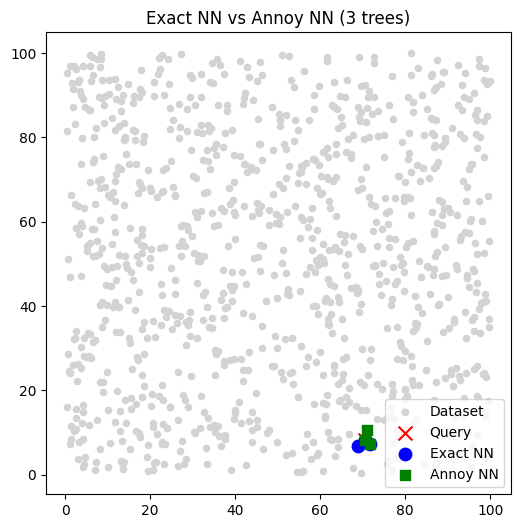

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan dan isikan hasil percobaan pada tabel berikut.

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 4.5762 ms

Annoy NN index: [219, 898, 593]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.2793154441691197)]
Waktu Annoy: 0.1531 ms


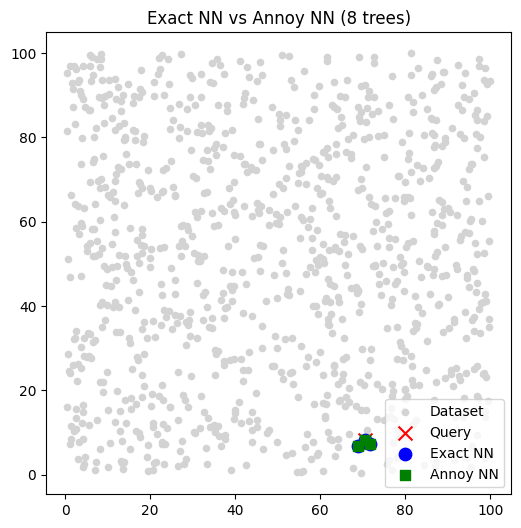

In [ ]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (8 trees) 1000 data

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (8 trees)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # menggunakan 8 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i] - query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (8 trees)")
plt.show()

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 7.6494 ms

Annoy NN index: [64040, 64186, 88792]
Annoy NN jarak: [np.float64(0.0), np.float64(0.1579786703429142), np.float64(0.2533271079062769)]
Waktu Annoy: 0.1369 ms


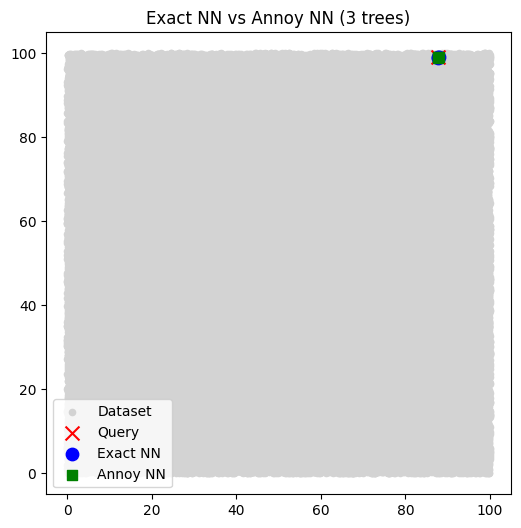

In [ ]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (3 trees) 100000 data

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (3 trees)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # menggunakan 3 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i] - query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [219 429 540]
Exact NN jarak (Angular): [0.00000000e+00 6.39189307e-07 1.06827100e-06]
Waktu Exact: 12.187 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak (Angular): [np.float64(0.0), np.float64(6.391893069279675e-07), np.float64(1.0682709955522895e-06)]
Waktu Annoy: 0.1316 ms


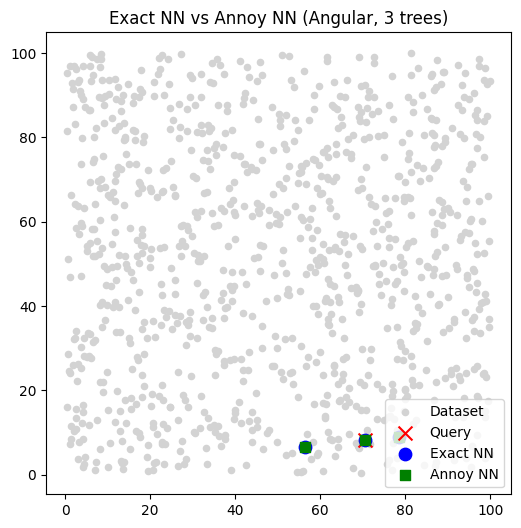

In [ ]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (Angular, 3 trees, 1000 data)

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force, pakai sudut kosinus)
def angular_distance(a, b):
    # rumus: jarak sudut = 1 - cos(theta)
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim

start = time.time()
distances = np.array([angular_distance(x, query) for x in X])
idx_exact = np.argsort(distances)[:3]
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak (Angular):", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (3 trees, Angular)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')  # gunakan metrik angular
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak (Angular):", [angular_distance(X[i], query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (Angular, 3 trees)")
plt.show()

Exact NN index: [219 429 540]
Exact NN jarak (Angular): [0.00000000e+00 6.39189307e-07 1.06827100e-06]
Waktu Exact: 26.9134 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak (Angular): [np.float64(0.0), np.float64(6.391893069279675e-07), np.float64(1.0682709955522895e-06)]
Waktu Annoy: 0.2306 ms


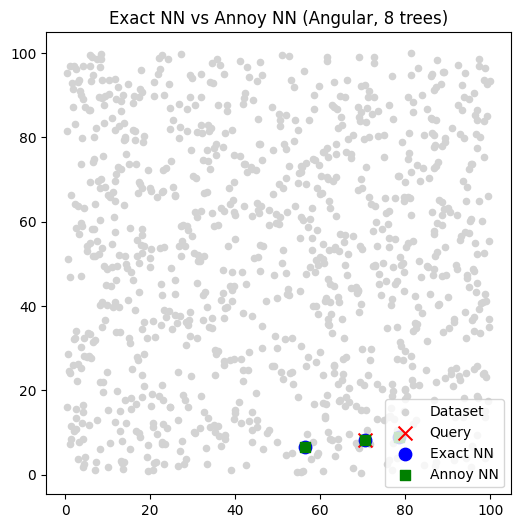

In [ ]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (Angular, 8 trees, 1000 data)

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force, pakai sudut kosinus)
def angular_distance(a, b):
    # rumus: jarak sudut = 1 - cos(theta)
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim

start = time.time()
distances = np.array([angular_distance(x, query) for x in X])
idx_exact = np.argsort(distances)[:3]
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak (Angular):", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (3 trees, Angular)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')  # gunakan metrik angular
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # 8 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak (Angular):", [angular_distance(X[i], query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (Angular, 8 trees)")
plt.show()

Exact NN index: [64040  1310  1267]
Exact NN jarak (Angular): [2.22044605e-16 6.23343599e-11 7.57095497e-11]
Waktu Exact: 1261.4977 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak (Angular): [np.float64(2.220446049250313e-16), np.float64(6.233435989599911e-11), np.float64(6.8060926894375484e-09)]
Waktu Annoy: 0.1221 ms


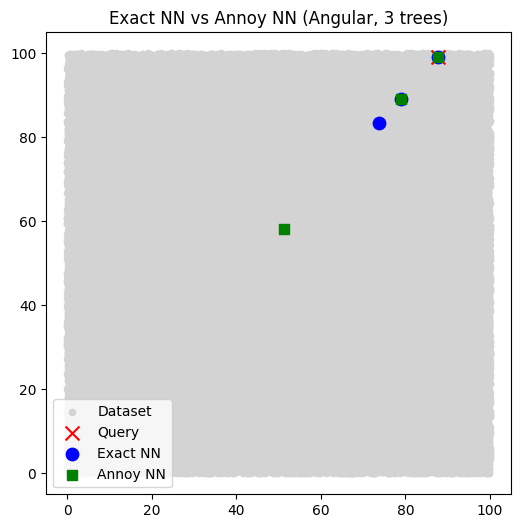

In [ ]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (Angular, 3 trees, 100000 data)

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force, pakai sudut kosinus)
def angular_distance(a, b):
    # rumus: jarak sudut = 1 - cos(theta)
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim

start = time.time()
distances = np.array([angular_distance(x, query) for x in X])
idx_exact = np.argsort(distances)[:3]
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak (Angular):", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (3 trees, Angular)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')  # gunakan metrik angular
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak (Angular):", [angular_distance(X[i], query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (Angular, 3 trees)")
plt.show()

Exact NN index: [64040  1310  1267]
Exact NN jarak (Angular): [2.22044605e-16 6.23343599e-11 7.57095497e-11]
Waktu Exact: 2073.2584 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak (Angular): [np.float64(2.220446049250313e-16), np.float64(6.233435989599911e-11), np.float64(6.8060926894375484e-09)]
Waktu Annoy: 0.1497 ms


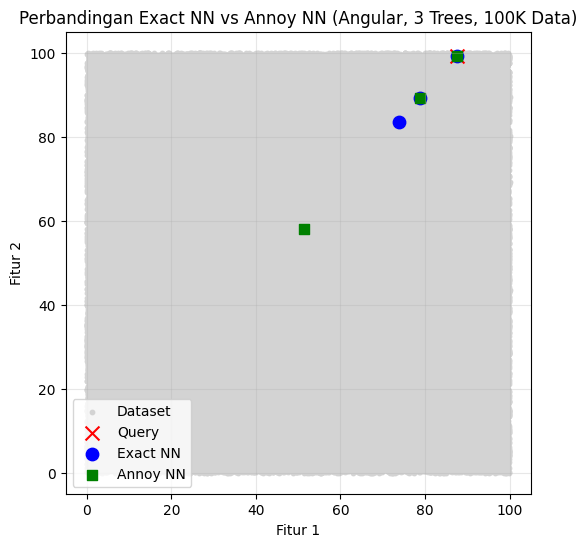

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D (100.000 titik)
np.random.seed(42)
n_points = 100_000
X = np.random.rand(n_points, 2) * 100  # titik acak dalam ruang 100x100

# Query point (ambil salah satu titik acak)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force) dengan jarak angular
def angular_distance(a, b):
    """Menghitung jarak angular: 1 - cos(theta)."""
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim

# Hitung semua jarak ke query
start = time.time()
distances = np.array([angular_distance(x, query) for x in X])
idx_exact = np.argsort(distances)[:3]
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak (Angular):", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Approximate NN dengan Annoy (3 trees, metrik angular)
f = 2  # dimensi
ann_index = AnnoyIndex(f, 'angular')

# Pengisian item ke index
for i, vec in enumerate(X):
    ann_index.add_item(i, vec)

# Bangun pohon (proses ini TIDAK dihitung dalam waktu pencarian)
ann_index.build(3)

# Query untuk mencari 3 tetangga terdekat
start = time.time()
idx_ann = ann_index.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak (Angular):", [angular_distance(X[i], query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=10, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Perbandingan Exact NN vs Annoy NN (Angular, 3 Trees, 100K Data)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(alpha=0.3)
plt.show()

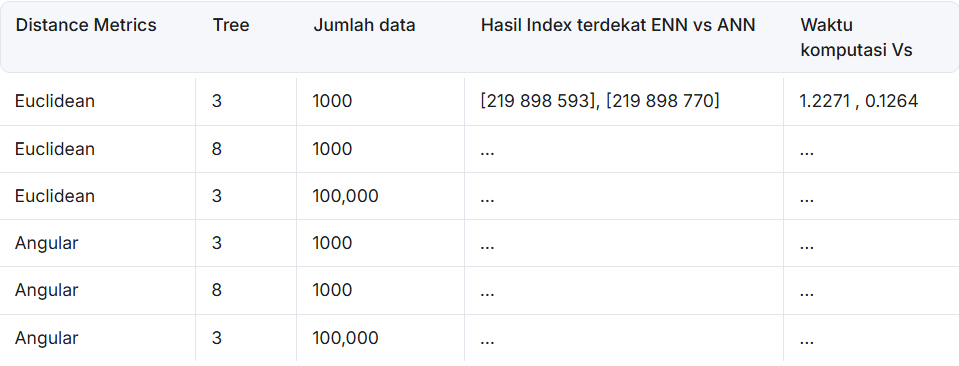

Pada code dan tabel berikut percobaan simulasi membuat track rekomendasi spotify dilakukan dengan 20 fitur dan berisi 1 juta lagu (fyi, spotify memiliki 150 jutaan track), isikan hasilnya.

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [24366515 16498439 37557288  6139048 15241853]
Exact NN time: 14.23 seconds


In [ ]:
# Perbandingan Exact NN vs Annoy (euclidean, 8 trees, 1 juta data)

import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# Dataset simulasi 50 juta lagu dengan 20 fitur
n_tracks = 1000000
n_features = 20
X = np.random.rand(n_tracks, n_features).astype(np.float32)
query = np.random.rand(1, n_features).astype(np.float32)

# Pencarian Exact Nearest Neighbor (brute force)
start = time.time()
distances = euclidean_distances(query, X)[0]
exact_idx = np.argsort(distances)[:5]
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# Pencarian Approximate Nearest Neighbor dengan Annoy
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# Pembuatan index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])

annoy_index.build(n_trees)

# Query pencarian lagu mirip menggunakan Annoy
start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [ 55628 908566 946091 686921 585882]
Exact NN time: 0.159 seconds
Annoy result: [746509, 186005, 487435, 86013, 140756]
Annoy time: 0.0 seconds


In [ ]:
# Perbandingan Exact NN vs Annoy (Angular, 8 trees, 1 juta data)

import numpy as np
import time
from annoy import AnnoyIndex

# Dataset simulasi 1 juta lagu dengan 20 fitur
n_tracks = 1_000_000
n_features = 20
X = np.random.rand(n_tracks, n_features).astype(np.float32)
query = np.random.rand(1, n_features).astype(np.float32)

# --- Exact Nearest Neighbor (brute force, Angular / Cosine) ---
def angular_distance(a, b):
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim  # jarak angular = 1 - cos θ

start = time.time()
distances = np.array([angular_distance(x, query[0]) for x in X])
exact_idx = np.argsort(distances)[:5]
exact_time = time.time() - start

print("=== Exact NN (Angular) ===")
print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# --- Approximate Nearest Neighbor dengan Annoy (Angular) ---
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# Pembuatan index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])

annoy_index.build(n_trees)

# Query pencarian lagu mirip menggunakan Annoy
start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)
annoy_time = time.time() - start

print("\n=== Annoy (Angular) ===")
print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

=== Exact NN (Angular) ===
Exact NN result: [ 73712 844208 427986 148345 901568]
Exact NN time: 7.795 seconds

=== Annoy (Angular) ===
Annoy result: [73712, 427986, 135012, 505468, 910249]
Annoy time: 0.0 seconds


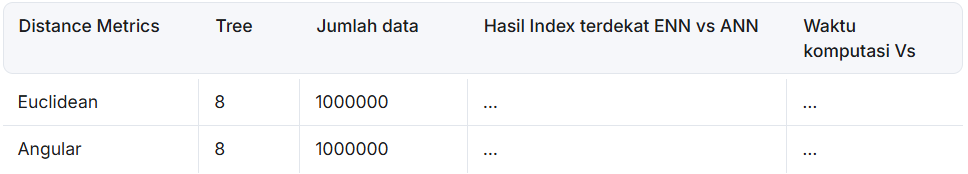

Pertanyaannya: Kenapa code dibagian build index tidak dihitung waktunya?

Jawab:

Bagian build index tidak dihitung waktunya karena bukan bagian dari proses pencarian (query phase), melainkan proses persiapan (indexing phase) yang hanya dilakukan sekali sebelum digunakan berulang-ulang untuk mencari tetangga terdekat.